Source data set : https://www.kaggle.com/datasets/rohitudageri/credit-card-details

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df1 = pd.read_csv("ML Dataset\prj_Credit_card.csv")
df2 = pd.read_csv("ML Dataset\prj_Credit_card_label.csv")
df = pd.merge(df1, df2, on='Ind_ID')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [3]:
# Drop variable Ind_ID >> krn merupakan index sehingga membuat seakan duplicate data tdk ada
df.drop(['Ind_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  EMAIL_ID         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
 17  label         

### Data Duplicates

In [4]:
def cekDataDuplicates(df_first):
    """
    Fungsi untuk import data & hapus duplikat
    :param filename: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sampel data
    """
    # read data
    print("Data asli            : ", df_first.shape, "- (#observasi, #kolom)")
    print("Data asli terdapat   : ", df_first.duplicated().sum(), "       - (#jumlah_duplicate)")

    # drop duplicates
    df = df_first.drop_duplicates()
    print("Data setelah di-drop : ", df.shape, "- (#observasi, #kolom)")

    return df

df = cekDataDuplicates(df)

Data asli            :  (1548, 18) - (#observasi, #kolom)
Data asli terdapat   :  162        - (#jumlah_duplicate)
Data setelah di-drop :  (1386, 18) - (#observasi, #kolom)


### Fields Renaming

In [5]:
df.rename(columns = {"GENDER":"Gender", "Propert_Owner":"Property_Owner","CHILDREN":"Children",
                     "Annual_income":"Annual_Income", "EDUCATION":"Education",
                     "Marital_status":"Marital_Status", "Housing_type":'Housing_Type',
                     "Birthday_count":"Birthday_Count", "Employed_days":"Employed_Days",
                     "Mobile_phone":"Mobile_Phone","EMAIL_ID":"Email_ID",
                     "label":"Label"}, inplace = True)

In [6]:
df.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Mobile_Phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,Label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Missing Data Handling

In [7]:
# checking for missing values
df.isnull().sum()

Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_ID             0
Type_Occupation    438
Family_Members       0
Label                0
dtype: int64

In [8]:
missed_numerical_column = ["Annual_Income","Birthday_Count"]

from sklearn.impute import SimpleImputer

def numericalImputation(data, numerical_column):
    """
    Fungsi untuk melakukan imputasi data numerik
    :param data: <pandas dataframe> sample data input
    :param numerical_column: <list> list kolom numerik data
    :return X_train_numerical: <pandas dataframe> data numerik
    :return imputer_numerical: numerical imputer method
    """
    # Filter data numerik
    numerical_data = data[numerical_column]

    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "median")
    imputer_numerical.fit(numerical_data)

    # Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index

    return numerical_data_imputed, imputer_numerical

# Imputation Numeric
df_numerical_imputed, imputer_numerical = numericalImputation(data = df,
                                                      numerical_column = missed_numerical_column)

df_numerical_imputed.isnull().any()

Annual_Income     False
Birthday_Count    False
dtype: bool

In [9]:
missed_categorical_column = ["Gender","Type_Occupation"]

def categoricalImputation(data, categorical_column):
    # Filter data categorical
    categorical_data = data[categorical_column]

    # Buat imputer
    imputer_categorical = SimpleImputer(missing_values = np.nan,
                                        strategy = "most_frequent")
    imputer_categorical.fit(categorical_data)

    # Transform
    imputed_data = imputer_categorical.transform(categorical_data)
    categorical_data_imputed = pd.DataFrame(imputed_data)

    categorical_data_imputed.columns = categorical_column
    categorical_data_imputed.index = categorical_data.index

    return categorical_data_imputed, imputer_categorical

# Imputation Numeric
df_categorical_imputed, imputer_categorical = categoricalImputation(data = df,
                                                      categorical_column = missed_categorical_column)

df_categorical_imputed.isnull().any()

Gender             False
Type_Occupation    False
dtype: bool

In [10]:
df_imputed = pd.concat([df_numerical_imputed,
                        df_categorical_imputed],
                        axis = 1)

In [11]:
df_columns = list(df.columns)
df_imputed_columns = list(df_imputed.columns)
df_non_imputed = list(set(df_columns).difference(set(df_imputed_columns)))
df_1 = pd.concat([df[df_non_imputed],
                 df_imputed],
                 axis = 1)

In [12]:
df_1.head()

,Children,Work_Phone,Type_Income,Car_Owner,Employed_Days,Family_Members,Education,Phone,Property_Owner,Label,Housing_Type,Marital_Status,Email_ID,Mobile_Phone,Annual_Income,Birthday_Count,Gender,Type_Occupation
0,0,0,Pensioner,Y,365243,2,Higher education,0,Y,1,House / apartment,Married,0,1,180000.0,-18772.0,M,Laborers
1,0,1,Commercial associate,Y,-586,2,Higher education,1,N,1,House / apartment,Married,0,1,315000.0,-13557.0,F,Laborers
2,0,1,Commercial associate,Y,-586,2,Higher education,1,N,1,House / apartment,Married,0,1,315000.0,-15611.5,F,Laborers
3,0,1,Commercial associate,Y,-586,2,Higher education,1,N,1,House / apartment,Married,0,1,162000.0,-13557.0,F,Laborers
5,0,1,Pensioner,Y,-586,2,Higher education,1,N,1,House / apartment,Married,0,1,315000.0,-13557.0,F,Laborers


### Outlier Handling

In [13]:
for col in df_1.columns:
    print(f"Field : {col}, #unique: {len(df_1[col].unique())}")

Field : Children, #unique: 6
Field : Work_Phone, #unique: 2
Field : Type_Income, #unique: 4
Field : Car_Owner, #unique: 2
Field : Employed_Days, #unique: 956
Field : Family_Members, #unique: 7
Field : Education, #unique: 5
Field : Phone, #unique: 2
Field : Property_Owner, #unique: 2
Field : Label, #unique: 2
Field : Housing_Type, #unique: 6
Field : Marital_Status, #unique: 5
Field : Email_ID, #unique: 2
Field : Mobile_Phone, #unique: 1
Field : Annual_Income, #unique: 115
Field : Birthday_Count, #unique: 1271
Field : Gender, #unique: 2
Field : Type_Occupation, #unique: 18


In [14]:
categorical_cols = ["Gender","Car_Owner","Property_Owner","Children","Type_Income",
                    "Education","Marital_Status","Housing_Type","Mobile_Phone",
                    "Work_Phone","Phone","Email_ID","Type_Occupation","Family_Members"]
for i in categorical_cols :
    print(f"Field {i} Memiliki Nilai : \n {df_1[i].unique()} \n")

Field Gender Memiliki Nilai : 
 ['M' 'F'] 

Field Car_Owner Memiliki Nilai : 
 ['Y' 'N'] 

Field Property_Owner Memiliki Nilai : 
 ['Y' 'N'] 

Field Children Memiliki Nilai : 
 [ 0  1  2  4  3 14] 

Field Type_Income Memiliki Nilai : 
 ['Pensioner' 'Commercial associate' 'Working' 'State servant'] 

Field Education Memiliki Nilai : 
 ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree'] 

Field Marital_Status Memiliki Nilai : 
 ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'] 

Field Housing_Type Memiliki Nilai : 
 ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment'] 

Field Mobile_Phone Memiliki Nilai : 
 [1] 

Field Work_Phone Memiliki Nilai : 
 [0 1] 

Field Phone Memiliki Nilai : 
 [0 1] 

Field Email_ID Memiliki Nilai : 
 [0 1] 

Field Type_Occupation Memiliki Nilai : 
 ['Laborers' 'Core staff' 'Cooking staff' 'Sales staff' 'Accountants'
 'H

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


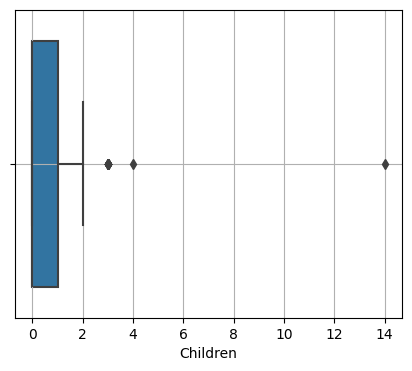

In [15]:
# Outlier Field Children
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(5,4))
sns.boxplot(data=df_1 , x="Children")
plt.grid()
plt.show()

In [16]:
# removing the extreme value of Children
df_1 = df_1[df_1['Children'] < 14]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


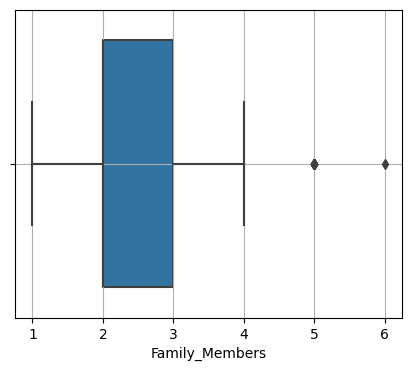

In [17]:
# Outlier Field Family_Members
plt.figure(figsize =(5,4))
sns.boxplot(data=df_1 , x="Family_Members")
plt.grid()
plt.show()

# removing the extreme value of Family_Members
df_1 = df_1[df_1['Family_Members'] < 15]

In [18]:
# Field Mobile_Phone >> homogenous >> drop saja
df_1 = df_1.drop(columns=["Mobile_Phone"])

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

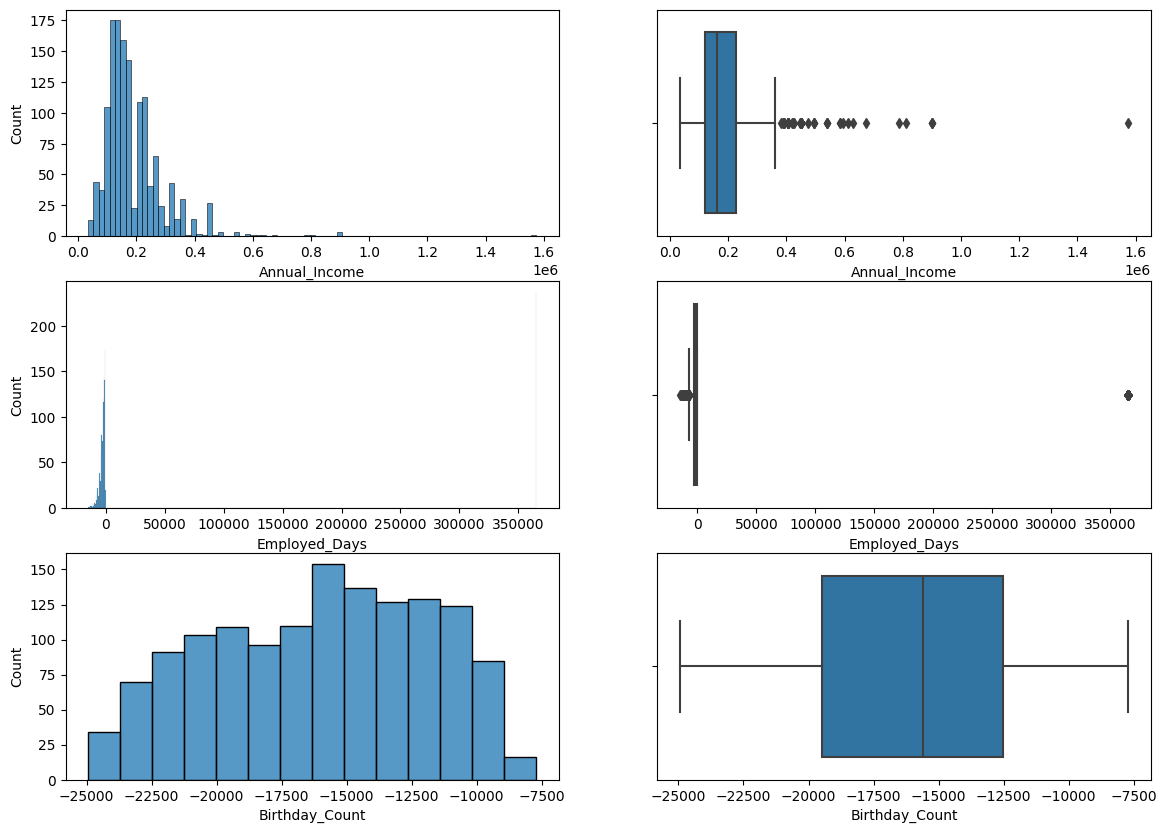

In [19]:
cont_cols = ["Annual_Income","Employed_Days","Birthday_Count"]

# Membuat subplot
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 10))

sns.histplot(df_1, 
             x = "Annual_Income", 
             ax = ax[0,0])

sns.boxplot(data=df_1,
            x="Annual_Income",
            ax = ax[0, 1])

sns.histplot(df_1, 
             x = "Employed_Days", 
             ax = ax[1,0])
sns.boxplot(data=df_1,
            x="Employed_Days",
            ax = ax[1, 1])

sns.histplot(df_1, 
             x = "Birthday_Count", 
             ax = ax[2,0])
sns.boxplot(data=df_1,
            x="Birthday_Count",
            ax = ax[2, 1])

plt.show()

In [20]:
# Outliers at Field Annual_Income

# function to detect outlier using IQR

def outliers_iqr(data):

    # initialize list that contains the outliers
    outliers = []

    # sort data values
    data = sorted(data)

    # compute the q1
    q1 = np.percentile(data, 25)
    # compute the q3
    q3 = np.percentile(data, 75)

    # compute the IQR
    IQR = q3-q1

    # set the lower bound
    lwr_bound =q1-(1.5*IQR)

    # set the upper bound
    upr_bound = q3+(1.5*IQR)

    # print computed lower and upper bound of a particular column
    print("Lower Bound :",lwr_bound, "Upper Bound :", upr_bound)

    # for each data point, decide whether it falls below lower bound or above upper ground
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [21]:
outlier = outliers_iqr(df_1["Annual_Income"])

print("Jumlah outliers pada Field Annual_Income adalah ", len(outlier))
print()

Lower Bound : -33750.0 Upper Bound : 380250.0
Jumlah outliers pada Field Annual_Income adalah  64



In [22]:
# membuat fungsi untuk handling outlier (ERROR)
def handling_outlier(data):
    
    # Mendefinisikan batas atas dan bawah outlier
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    data=np.where(data>upper_whisker,upper_whisker,np.where(data<lower_whisker,lower_whisker,data))

handling_outlier(df_1["Annual_Income"])

In [23]:
Q1 = df_1["Annual_Income"].quantile(0.25)
Q3 = df_1["Annual_Income"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df_1["Annual_Income"]=np.where(df_1["Annual_Income"]>upper_whisker,upper_whisker,
                      np.where(df_1["Annual_Income"]<lower_whisker,lower_whisker,
                      df_1["Annual_Income"]))

In [24]:
outlier = outliers_iqr(df_1["Employed_Days"])

print("Jumlah outliers pada Field Employed_Days adalah ", len(outlier))
print()

Lower Bound : -7267.0 Upper Bound : 3701.0
Jumlah outliers pada Field Employed_Days adalah  304



In [25]:
Q1 = df_1["Employed_Days"].quantile(0.25)
Q3 = df_1["Employed_Days"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df_1["Employed_Days"]=np.where(df_1["Employed_Days"]>upper_whisker,upper_whisker,
                      np.where(df_1["Employed_Days"]<lower_whisker,lower_whisker,
                      df_1["Employed_Days"]))

In [26]:
df_1.head()

,Children,Work_Phone,Type_Income,Car_Owner,Employed_Days,Family_Members,Education,Phone,Property_Owner,Label,Housing_Type,Marital_Status,Email_ID,Annual_Income,Birthday_Count,Gender,Type_Occupation
0,0,0,Pensioner,Y,3701.0,2,Higher education,0,Y,1,House / apartment,Married,0,180000.0,-18772.0,M,Laborers
1,0,1,Commercial associate,Y,-586.0,2,Higher education,1,N,1,House / apartment,Married,0,315000.0,-13557.0,F,Laborers
2,0,1,Commercial associate,Y,-586.0,2,Higher education,1,N,1,House / apartment,Married,0,315000.0,-15611.5,F,Laborers
3,0,1,Commercial associate,Y,-586.0,2,Higher education,1,N,1,House / apartment,Married,0,162000.0,-13557.0,F,Laborers
5,0,1,Pensioner,Y,-586.0,2,Higher education,1,N,1,House / apartment,Married,0,315000.0,-13557.0,F,Laborers


### Encoding / Mapping

In [27]:
# for Car_Owner column
df_1['Car_Owner'] = df_1['Car_Owner'].map({'Y':1,'N':0})

# for Property_owner column
df_1['Property_Owner'] = df_1['Property_Owner'].map({'Y':1,'N':0})

# for gender column
df_1['Gender'] = df_1['Gender'].map({'M':1,'F':0})

In [28]:
df_1['Education'].value_counts()

Education
Secondary / secondary special    930
Higher education                 374
Incomplete higher                 61
Lower secondary                   18
Academic degree                    2
Name: count, dtype: int64

In [29]:
# importing ordinal encoder untuk data categorical

from sklearn.preprocessing import OrdinalEncoder

# values to ordinal
cols_order = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']

x = OrdinalEncoder(categories=[cols_order])

df_1['Education'] = x.fit_transform(df_1[['Education']])

In [30]:
df_1.head()

,Children,Work_Phone,Type_Income,Car_Owner,Employed_Days,Family_Members,Education,Phone,Property_Owner,Label,Housing_Type,Marital_Status,Email_ID,Annual_Income,Birthday_Count,Gender,Type_Occupation
0,0,0,Pensioner,1,3701.0,2,3.0,0,1,1,House / apartment,Married,0,180000.0,-18772.0,1,Laborers
1,0,1,Commercial associate,1,-586.0,2,3.0,1,0,1,House / apartment,Married,0,315000.0,-13557.0,0,Laborers
2,0,1,Commercial associate,1,-586.0,2,3.0,1,0,1,House / apartment,Married,0,315000.0,-15611.5,0,Laborers
3,0,1,Commercial associate,1,-586.0,2,3.0,1,0,1,House / apartment,Married,0,162000.0,-13557.0,0,Laborers
5,0,1,Pensioner,1,-586.0,2,3.0,1,0,1,House / apartment,Married,0,315000.0,-13557.0,0,Laborers


In [31]:
# Encoder untuk non categorical data

def OHE_Process(data, column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    df_ohe = pd.get_dummies(data, columns=column,drop_first=True)
    return df_ohe

ohe_cols = df[["Type_Income","Housing_Type","Marital_Status","Type_Occupation"]].columns
df_2 = OHE_Process(data=df_1, column=ohe_cols)
df_2.head()

,Children,Work_Phone,Car_Owner,Employed_Days,Family_Members,Education,Phone,Property_Owner,Label,Email_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0,0,1,3701.0,2,3.0,0,1,1,0,...,True,False,False,False,False,False,False,False,False,False
1,0,1,1,-586.0,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
2,0,1,1,-586.0,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
3,0,1,1,-586.0,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
5,0,1,1,-586.0,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False


### Standarisasi

In [32]:
from sklearn.preprocessing import StandardScaler

scaled_features = df_2.copy()

col_names = ["Annual_Income","Birthday_Count","Employed_Days"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
df_3 = pd.DataFrame(scaled_features)
df_3.head()

,Children,Work_Phone,Car_Owner,Employed_Days,Family_Members,Education,Phone,Property_Owner,Label,Email_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0,0,1,1.733286,2,3.0,0,1,1,0,...,True,False,False,False,False,False,False,False,False,False
1,0,1,1,0.292901,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
2,0,1,1,0.292901,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
3,0,1,1,0.292901,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False
5,0,1,1,0.292901,2,3.0,1,0,1,0,...,True,False,False,False,False,False,False,False,False,False


### Handling imbalance

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


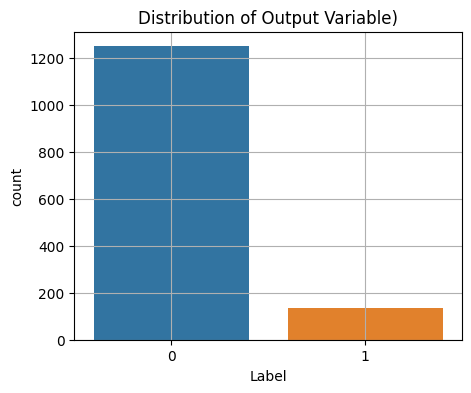

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(data=df_3, x ='Label')
plt.title("Distribution of Output Variable)")

plt.grid()
plt.show()

In [34]:
df_3['Label'].value_counts()

Label
0    1248
1     137
Name: count, dtype: int64

In [35]:
X = df_3.drop(columns=['Label'])
y = df_3['Label']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,     # Data imblacnce: test kecil saja
                                                    random_state = 123)

In [37]:
X_train.shape

(1108, 41)

In [38]:
X_test.shape

(277, 41)

In [39]:
y_train.value_counts(normalize = True)

# Data tdk balance

Label
0    0.901625
1    0.098375
Name: proportion, dtype: float64

In [40]:
from imblearn.over_sampling import SMOTE

# Buat objek
smt = SMOTE(sampling_strategy = "not majority",
            random_state = 23)

# Fit objek
X_Smote, y_Smote = smt.fit_resample(X_train, y_train)

y_Smote.value_counts()

Label
0    999
1    999
Name: count, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

# Buat objek
smt = SMOTE(sampling_strategy = "not majority",
            random_state = 23)

# Fit objek
X_Smote_test, y_Smote_test = smt.fit_resample(X_test, y_test)

y_Smote.value_counts()

Label
0    999
1    999
Name: count, dtype: int64

### Logistic Regression

#### Baseline

In [43]:
# Odds of guessing minority correct:
proba_minority = 0.0988
proportion_minority = y.value_counts(normalize = True)[1]

odds_minority = proba_minority * proportion_minority
odds_minority

0.009772996389891698

In [44]:
# Odds of guessing majority correct:
proba_majority = 0.9011
proportion_majority = y.value_counts(normalize = True)[0]

odds_majority = proba_majority * proportion_majority
odds_majority

0.8119659205776174

In [45]:
# Odds total
odds_minority + odds_majority

0.8217389169675091

In [46]:
# Cara lain, pakai stratified dummy classifier
# Buat objek
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = "stratified",
                            random_state = 123)

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(random_state=123, strategy='stratified')

In [47]:
# Predict
y_pred_dummy = dummy_clf.predict(X_train)

In [48]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_true = y_train,          # tanpa y_true dan y_pred juga tdk mengapa
                 y_pred = y_pred_dummy)
conf
# [[tp, fp]]
# [[fn, tn]]

array([[894, 105],
       [100,   9]], dtype=int64)

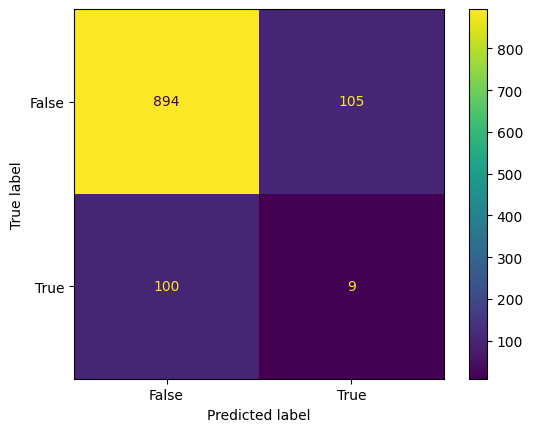

In [50]:
# Self Additional
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [51]:
# Cari score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)
print(f"Nilai Accuracy : {accuracy_score}")
print(f"Classification in Report forms : ")
print(classification_report(y_true = y_train,
                            y_pred = y_pred_dummy,
                            target_names = ["0","1"]))

Nilai Accuracy : <function accuracy_score at 0x00000219D37C91C0>
Classification in Report forms : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       999
           1       0.08      0.08      0.08       109

    accuracy                           0.81      1108
   macro avg       0.49      0.49      0.49      1108
weighted avg       0.82      0.81      0.82      1108



#### Logistic Regression

In [52]:
# Buat weight class  (krn jumlah tdk seimbang)
n_samples = len(y_train)                    
n_classes = len(y_train.value_counts())         
n_samples_j = y_train.value_counts()            

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

# Kita kasih weight yang lebih besar untuk kelas 1

Label
0    0.554555
1    5.082569
Name: count, dtype: float64

In [53]:
# Import library
from sklearn.linear_model import LogisticRegression

# Buat objek  (class_weight = dict(class_weight))
logreg = LogisticRegression(solver = "liblinear",
                            max_iter=1000,   # Liblinear agar dpt menggunakan regularization
                            random_state = 123)

In [54]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}   # see notes

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [55]:
# Lakukan Fitting Data
logreg_cv.fit(X = X_Smote,
              y = y_Smote)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=123,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [56]:
# Best params dari CV
logreg_cv.best_params_

{'C': 6.1584821106602545, 'penalty': 'l1'}

In [57]:
# Buat best model menggunakan logistic regression (class_weight = dict(class_weight))
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_Smote, y_Smote)

y_pred_train_logreg = logreg.predict(X_Smote)

In [58]:
# Buat prediksi probability
y_pred_train_proba = logreg.predict_proba(X_Smote)
y_pred_train_proba

# [1 - P(y = 1), P(y = 1)]

array([[7.36470535e-01, 2.63529465e-01],
       [8.36622601e-01, 1.63377399e-01],
       [2.34495695e-01, 7.65504305e-01],
       ...,
       [4.60361691e-02, 9.53963831e-01],
       [1.39027476e-01, 8.60972524e-01],
       [1.34733898e-04, 9.99865266e-01]])

In [59]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_Smote,
                 y_pred = y_pred_train_logreg)

# [[tp, fp]]
# [[fn, tn]]


array([[880, 119],
       [185, 814]], dtype=int64)

In [60]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_Smote,
                            y_pred = y_pred_train_logreg,
                            target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.87      0.81      0.84       999

    accuracy                           0.85      1998
   macro avg       0.85      0.85      0.85      1998
weighted avg       0.85      0.85      0.85      1998



In [61]:
# Buat best model menggunakan logistic regression (class_weight = dict(class_weight))
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_Smote_test, y_Smote_test)

y_pred_train_logreg = logreg.predict(X_Smote_test)

In [62]:
# Test Dataset
# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(X_Smote_test)
y_pred_test_proba

# [1 - P(y = 1), P(y = 1)]

array([[9.98773350e-01, 1.22665022e-03],
       [9.92256891e-01, 7.74310874e-03],
       [8.67510596e-01, 1.32489404e-01],
       [8.92257435e-01, 1.07742565e-01],
       [9.96279482e-01, 3.72051803e-03],
       [9.99301040e-01, 6.98960057e-04],
       [9.49501700e-01, 5.04983003e-02],
       [9.87006122e-01, 1.29938779e-02],
       [9.85047814e-01, 1.49521863e-02],
       [7.10624667e-01, 2.89375333e-01],
       [9.42799225e-01, 5.72007750e-02],
       [4.30757881e-01, 5.69242119e-01],
       [5.19491205e-01, 4.80508795e-01],
       [9.99273982e-01, 7.26017594e-04],
       [9.24656210e-01, 7.53437896e-02],
       [9.43353827e-01, 5.66461731e-02],
       [9.75422988e-01, 2.45770124e-02],
       [8.23499466e-01, 1.76500534e-01],
       [7.74593242e-01, 2.25406758e-01],
       [6.99763279e-01, 3.00236721e-01],
       [8.23726371e-01, 1.76273629e-01],
       [1.82870352e-01, 8.17129648e-01],
       [7.62617336e-01, 2.37382664e-01],
       [4.50340846e-01, 5.49659154e-01],
       [8.711780

In [63]:
y_pred_test = logreg.predict(X_Smote_test)

# Tampilkan confusion matrix
confusion_matrix(y_true = y_Smote_test,
                 y_pred = y_pred_test)

# [[tp, fp]]
# [[fn, tn]]

array([[222,  27],
       [ 25, 224]], dtype=int64)

In [64]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_Smote_test,
                            y_pred = y_pred_test,
                            target_names = ["0", "1"]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       249
           1       0.89      0.90      0.90       249

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [65]:
from sklearn.metrics import f1_score
f1 = f1_score(y_Smote_test, y_pred_test)
f1

0.8959999999999999

#### Logitboost

In [68]:
from logitboost import LogitBoost
from sklearn.metrics import accuracy_score

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_Smote, y_Smote)

y_pred_train = lboost.predict(X_Smote)
y_pred_test = lboost.predict(X_Smote_test)

accuracy_train = accuracy_score(y_Smote, y_pred_train)
accuracy_test = accuracy_score(y_Smote_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWa

Training accuracy: 0.8979
Test accuracy:     0.7791


c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [69]:
report_train = classification_report(y_Smote, y_pred_train)
report_test = classification_report(y_Smote_test, y_pred_test)
print('Training\n%s' % report_train)
print('Testing\n%s' % report_test)

Training
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       999
           1       0.92      0.88      0.90       999

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

Testing
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       249
           1       0.87      0.65      0.75       249

    accuracy                           0.78       498
   macro avg       0.80      0.78      0.78       498
weighted avg       0.80      0.78      0.78       498



### XGBoost

In [72]:
# import pandas for data wrangling
import pandas as pd
# import numpy for Scientific computations
import numpy as np

# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [73]:
df_X = df_3.drop(columns=['Label'])
df_y = df_3['Label']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 0)

In [75]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'eta': hp.uniform('eta', 0.1, 0.3),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'],
                    eta =space['eta'],
                    max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree'])
                    )
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [76]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.8953068592057761                                     
SCORE:                                                                            
0.8953068592057761                                                                
  1%|          | 1/100 [00:00<00:19,  5.13trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                            
0.8953068592057761                                                                
  3%|▎         | 3/100 [00:00<00:08, 11.28trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                            
0.8953068592057761                                                                
  7%|▋         | 7/100 [00:00<00:07, 12.57trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                            
0.8953068592057761                                                                
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 12%|█▏        | 12/100 [00:00<00:05, 16.44trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 15%|█▌        | 15/100 [00:01<00:04, 17.12trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 19%|█▉        | 19/100 [00:01<00:04, 18.48trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 23%|██▎       | 23/100 [00:01<00:04, 17.75trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 27%|██▋       | 27/100 [00:01<00:04, 16.31trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 31%|███       | 31/100 [00:02<00:04, 14.53trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 35%|███▌      | 35/100 [00:02<00:04, 15.49trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 39%|███▉      | 39/100 [00:02<00:03, 15.33trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 


c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 45%|████▌     | 45/100 [00:03<00:04, 13.75trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 49%|████▉     | 49/100 [00:03<00:03, 14.36trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 51%|█████     | 51/100 [00:03<00:03, 14.22trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 55%|█████▌    | 55/100 [00:03<00:03, 14.32trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 57%|█████▋    | 57/100 [00:03<00:03, 14.22trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 61%|██████    | 61/100 [00:04<00:02, 14.17trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 65%|██████▌   | 65/100 [00:04<00:02, 14.57trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 69%|██████▉   | 69/100 [00:04<00:02, 15.20trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 73%|███████▎  | 73/100 [00:04<00:01, 14.61trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 75%|███████▌  | 75/100 [00:05<00:02, 11.86trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 77%|███████▋  | 77/100 [00:05<00:01, 12.57trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 81%|████████  | 81/100 [00:05<00:01, 13.81trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 85%|████████▌ | 85/100 [00:05<00:01, 14.07trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 89%|████████▉ | 89/100 [00:06<00:00, 13.66trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 93%|█████████▎| 93/100 [00:06<00:00, 14.31trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 95%|█████████▌| 95/100 [00:06<00:00, 14.15trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
 97%|█████████▋| 97/100 [00:06<00:00, 14.38trial/s, best loss: -0.8953068592057761]

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for b

SCORE:                                                                             
0.8953068592057761                                                                 
SCORE:                                                                             
0.8953068592057761                                                                 
100%|██████████| 100/100 [00:06<00:00, 14.43trial/s, best loss: -0.8953068592057761]


c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\Jhn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



In [77]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5508702792118942, 'eta': 0.1584004394337244, 'gamma': 2.1384430797511866, 'max_depth': 11.0, 'min_child_weight': 3.0, 'reg_alpha': 79.0, 'reg_lambda': 0.15546938936829935}


In [78]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

param = {
    "colsample_bytree": 0.7130651591677246,
    "gamma": 2.5622030999018683,
    "max_depth":7,
    "eta": 0.2765726381158188,
    "min_child_weight": 2.0,
    "reg_alpha": 112.0,
    "reg_lambda": 0.8545258361107341,
    #"objective": "multi:softmax",
    "num_class": 2
    }
epochs = 10

model = xgb.train(param, train, epochs)

predictions = model.predict(test)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8953068592057761